# DTSC - 670 Final Project 

## Name: Ben Anderson

## Problem Framing & Big Picture

### Clearly communicate the problem and objective in business terms and how your solution will be used

The core issue is the need to identify students who are at risk for academic performance issues based on related features. However, such features have not been fully explored in association to performance. Therefore, the primary objective is to develop a machine learning model capable of predicting a student's performance based on relevant and validated indicators. This information will help decision makers and students who need additional support or intervention to improve academically.

### How should you frame this problem (supervised/unsupervised, online/offline, etc)? Briefly explain these terms 

In supervised learning, the data used to feed into the algorithm includes the desired solutions (Geron, 2022). The Portuguese school dataset includes the historical input and output data,so I will be utilizing a supervised learning technique. Supervised learning is ideal for predicting outcomes based on input data. Because the dataset is static, without any real-time updates, batch instead of online learning is a suitable solution. Understanding the underlying patterns in the data to make a prediction makes it batch, model-based, supervised learning system. 

### Discuss the specific machine learning task and how it could solve the business problem. Briefly explain the difference

The most common supervised learning tasks are regression (predicting values) and classification (predicting classes) (Geron, 2022). The output target within the school dataset is represented by a numberic final grade,"G3 - final grade", so a regression learning task will explored. Regression can effectively utilize various features in the dataset (such as attendance, study time, family background, etc.) to establish a relationship with the final grade, providing a comprehensive view of factors affecting academic performance.

### Identify the metrics that you will use to measure the model’s performance.

To understand how much error the system makes in its predictions, the Root Mean Square Error (RMSE) will be selected. Because the RMSE is sensitive to outliers, the mean absolute error will also be generated for comparison. Both the RMSE and MAE are ways to measure the distance between the vector of predictions and the vector of targets values (Geron, 2022).

### Is there anything else that your director or board of directors need to know about this project?

The transparency of this model and integration of its findings into our existing systems are crucial for fostering trust and engagement among all stakeholders, which is fundamental for driving positive change. My aim is to ensure that the model serves as a reliable assistant in our collective efforts to improve student outcomes, reinforcing the critical role of human insight and judgment in the process. However, it's important to recognize the limitations of the model and view it as an invaluable tool designed to support and enhance human decision-making. 

## Get the Data

### Correctly import data

In [1]:
# std imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 20)

### Check size and type of data 

In [2]:
# student dataframe load
sd = pd.read_csv('student-mat.csv')

In [3]:
#check size and dtypes
sd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

### List the available features and their data descriptions so that your director/board of directors can understand your work


#### Attributes
1.	school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2.	sex - student's sex (binary: "F" - female or "M" - male)
3.	age - student's age (numeric: from 15 to 22)
4.	address - student's home address type (binary: "U" - urban or "R" - rural)
5.	famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6.	Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7.	Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8.	Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9.	Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10.	Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11.	reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12.	guardian - student's guardian (nominal: "mother", "father" or "other")
13.	traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30
min. to 1 hour, or 4 - >1 hour)
14.	studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours,
or 4 - >10 hours)
15.	failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16.	schoolsup - extra educational support (binary: yes or no)
17.	famsup - family educational support (binary: yes or no)
18.	paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19.	activities - extra-curricular activities (binary: yes or no)
20.	nursery - attended nursery school (binary: yes or no)
21.	higher - wants to take higher education (binary: yes or no)
22.	internet - Internet access at home (binary: yes or no)
23.	romantic - with a romantic relationship (binary: yes or no)
24.	famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25.	freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26.	goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27.	Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28.	Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29.	health - current health status (numeric: from 1 - very bad to 5 - very good)
30.	absences_G1 - number of school absences for G1 term (numeric)
31.	absences_G2 - number of school absences for G2 term (numeric)
32.	absences_G3 - number of school absences for G3 term (numeric)
33.	G1 - first term grade (numeric: from 0 to 20)
34.	G2 - second term grade (numeric: from 0 to 20)
35.	G3 - final grade (numeric: from 0 to 20)

### Identify the target

#### Target

- **G3**: Final grade (numeric: from 0 to 20) - This is the target variable in the regression task.


In [4]:
student_targ = sd['G3']
student_feat = sd.drop(['G3'], axis=1).copy()

### Correctly split into training and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(student_feat, student_targ, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 34), (79, 34), (316,), (79,))

## Explore the data to gain insights.

### 1. Thoroughly study the attributes and their characteristics
### 2. Produce at least four visualizations to assist in exploring the data. 
### 3. Study the correlations between discrete and continuous numerical attributes

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       316 non-null    object 
 1   sex          316 non-null    object 
 2   age          305 non-null    float64
 3   address      316 non-null    object 
 4   famsize      316 non-null    object 
 5   Pstatus      316 non-null    object 
 6   Medu         316 non-null    int64  
 7   Fedu         316 non-null    int64  
 8   Mjob         316 non-null    object 
 9   Fjob         316 non-null    object 
 10  reason       316 non-null    object 
 11  guardian     316 non-null    object 
 12  traveltime   316 non-null    int64  
 13  studytime    316 non-null    int64  
 14  failures     316 non-null    int64  
 15  schoolsup    316 non-null    object 
 16  famsup       316 non-null    object 
 17  paid         316 non-null    object 
 18  activities   316 non-null    object 
 19  nursery    

In [7]:
# check basic stats for numeric and categorical features
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
count,305.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000
mean,16.747541,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,0.704918,0.704918,4.488525,10.933544,10.651899
std,1.274188,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,1.373435,1.373435,5.824238,3.216823,3.755930
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000


Text(0.5, 1.0, 'Final Grade Distribution')

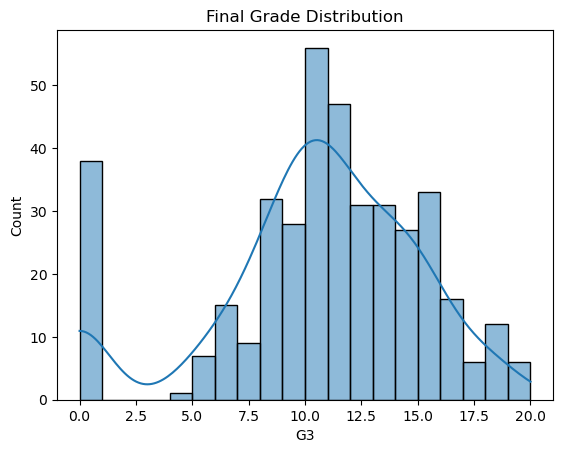

In [8]:
# Target variable distribution
sns.histplot(data=sd, x="G3", bins=20, kde=True)
plt.title("Final Grade Distribution")

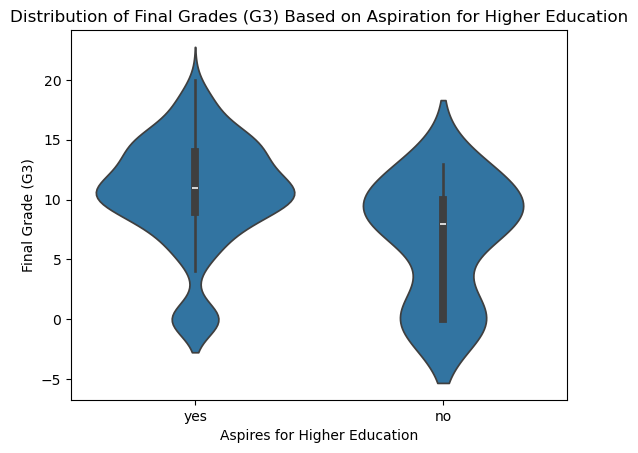

In [9]:
# Create a violin plot
sns.violinplot(x='higher', y='G3', data=sd)

plt.title('Distribution of Final Grades (G3) Based on Aspiration for Higher Education')
plt.xlabel('Aspires for Higher Education')
plt.ylabel('Final Grade (G3)')

plt.show()


In [10]:
sd['higher'].value_counts()

higher
yes    375
no      20
Name: count, dtype: int64

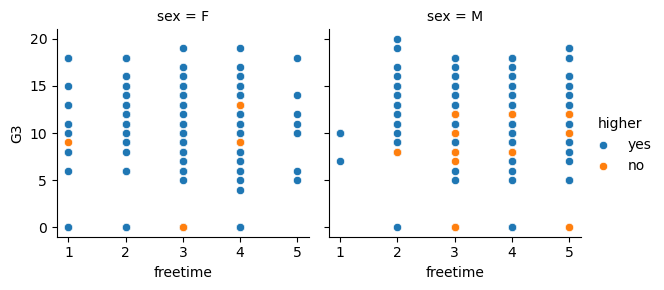

In [11]:
t = sns.FacetGrid(sd, col='sex', hue='higher')
t.map_dataframe(sns.scatterplot, x='freetime', y='G3')
t.add_legend();

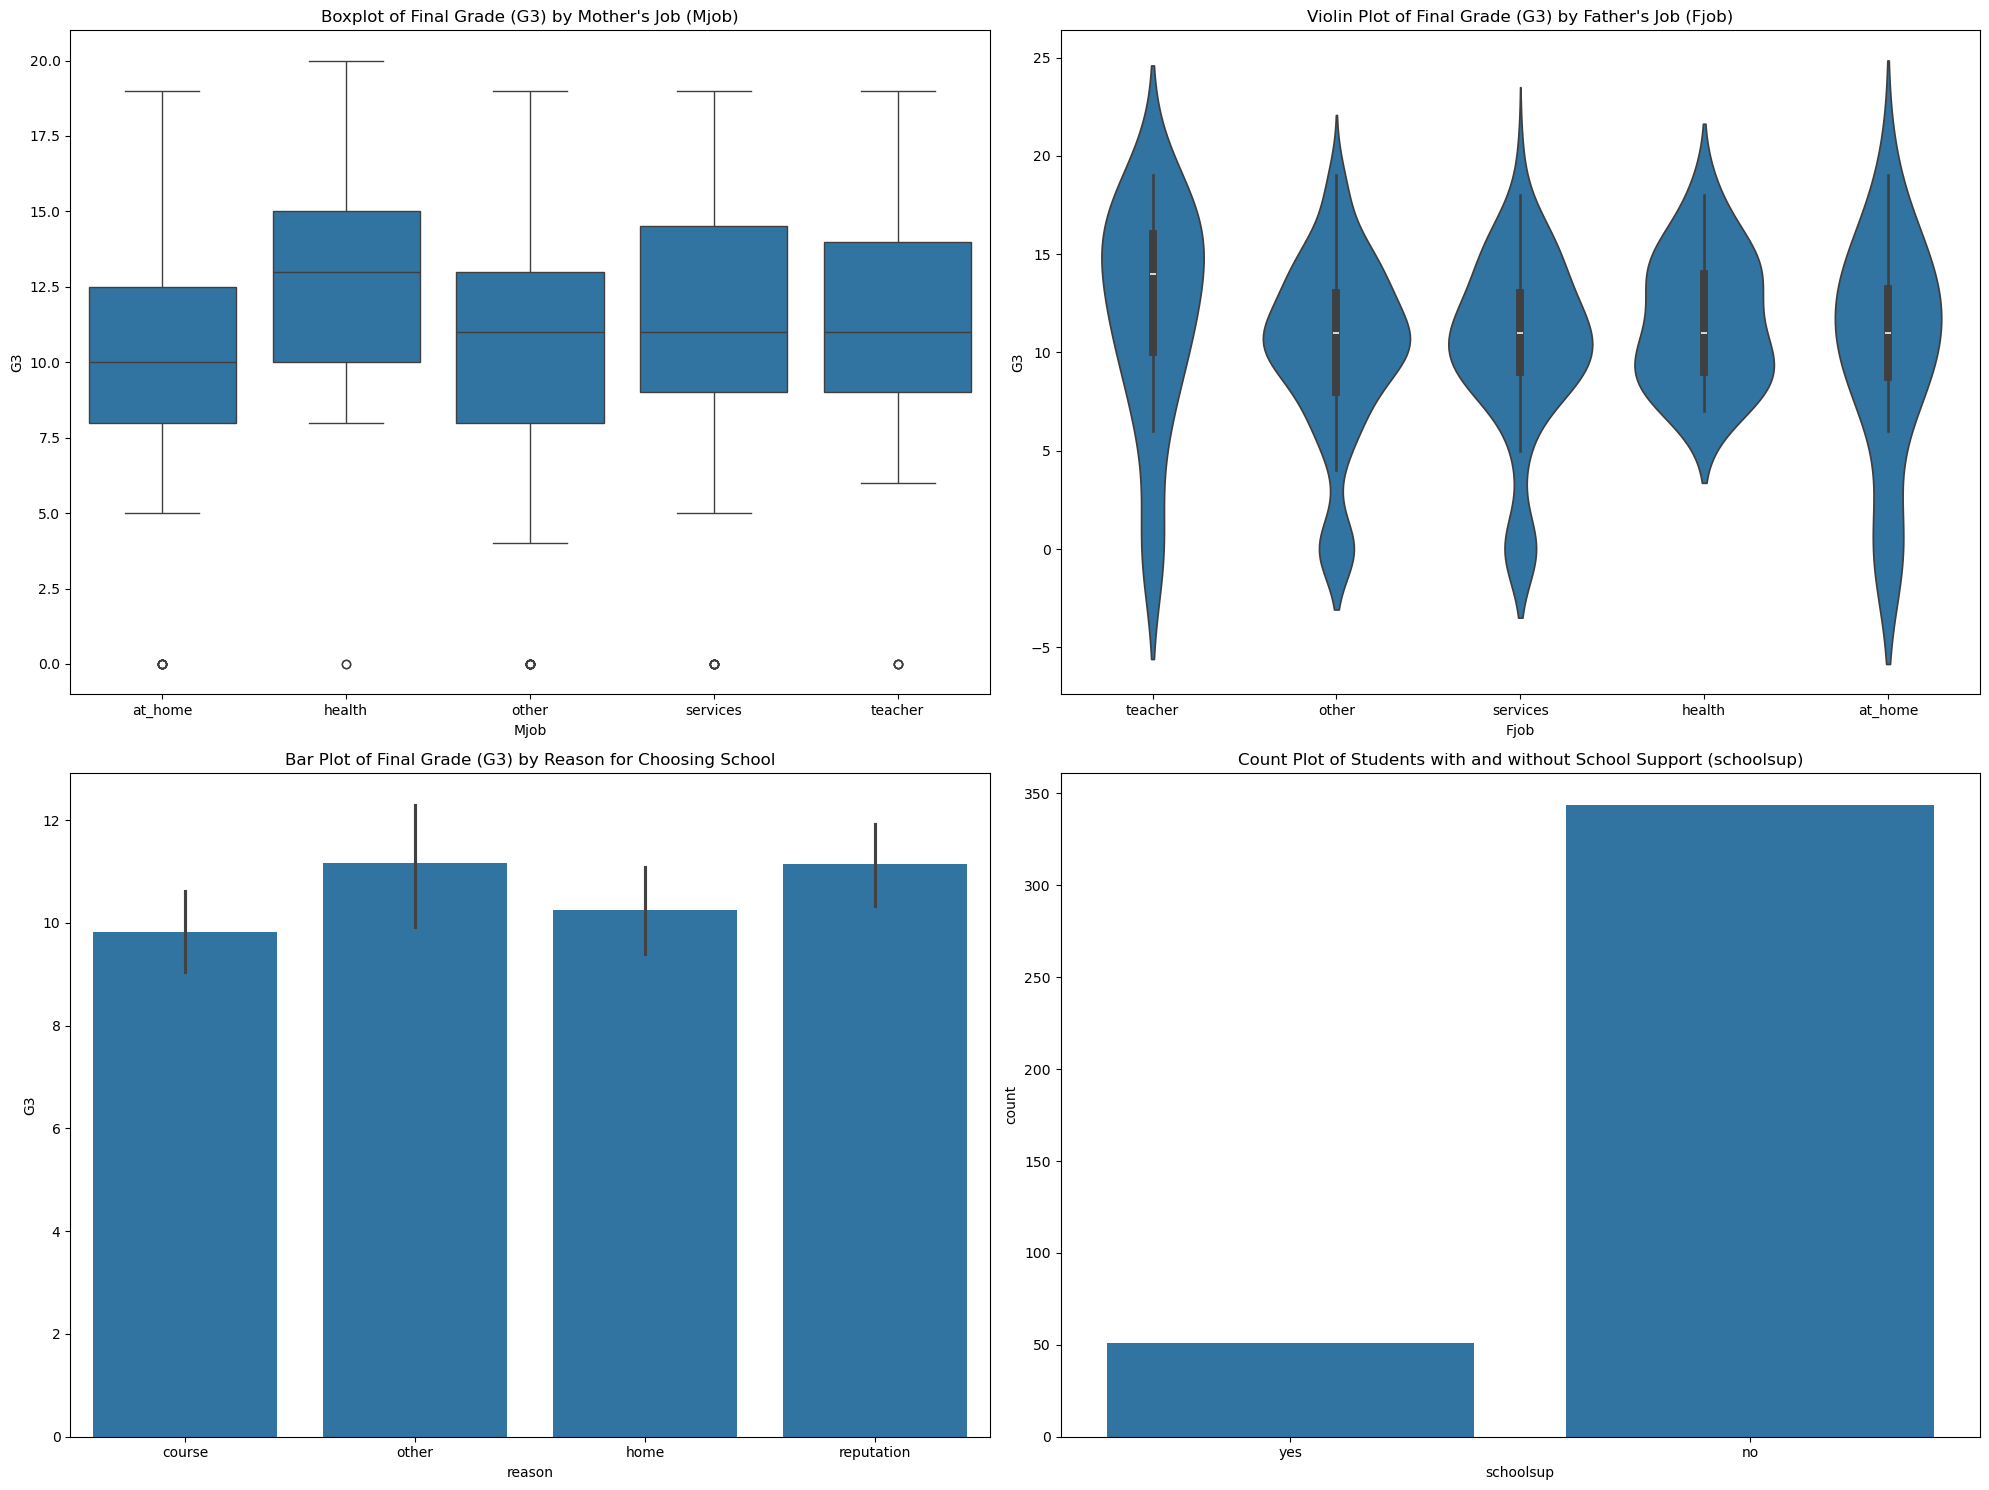

In [12]:
categorical_vars = ['Mjob', 'Fjob', 'reason', 'schoolsup']

# Plotting
plt.figure(figsize=(20, 15))

# Boxplot for 'Mjob' vs 'G3'
plt.subplot(2, 2, 1)
sns.boxplot(x='Mjob', y='G3', data=sd)
plt.title('Boxplot of Final Grade (G3) by Mother\'s Job (Mjob)')

# Violin plot for 'Fjob' vs 'G3'
plt.subplot(2, 2, 2)
sns.violinplot(x='Fjob', y='G3', data=sd)
plt.title('Violin Plot of Final Grade (G3) by Father\'s Job (Fjob)')

# Bar plot for 'reason' vs 'G3'
plt.subplot(2, 2, 3)
sns.barplot(x='reason', y='G3', data=sd)
plt.title('Bar Plot of Final Grade (G3) by Reason for Choosing School')

# Count plot for 'schoolsup' vs 'G3'
plt.subplot(2, 2, 4)
sns.countplot(x='schoolsup', data=sd)
plt.title('Count Plot of Students with and without School Support (schoolsup)')

plt.tight_layout()
plt.show()

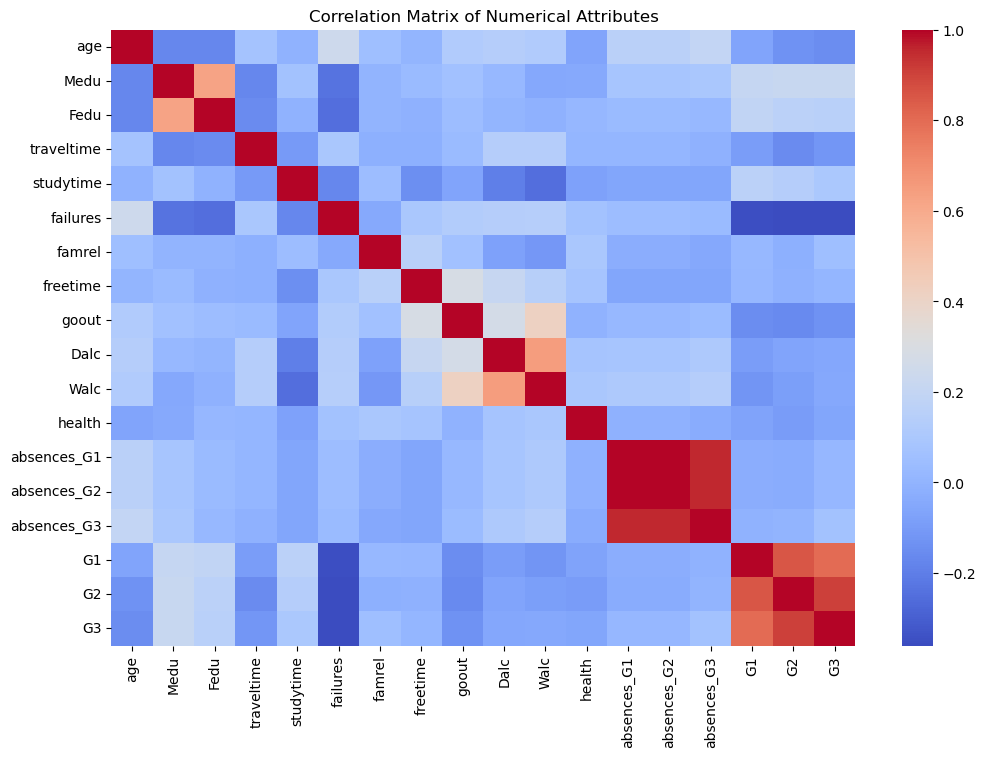

In [13]:
# Selecting columns that are not of object type from 'sd'
nc = sd.select_dtypes(exclude=['object'])

# Calculating the correlation matrix
corr_matrix = nc.corr()

# Plotting the heatmap without annotations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Attributes")
plt.show()

In [14]:
# Calculating the correlation with G3 and sorting the values
corr_with_G3 = nc.corr()['G3'].sort_values(ascending=False)

# Display the sorted correlation values
corr_with_G3

G3             1.000000
G2             0.904868
G1             0.801468
Medu           0.217147
Fedu           0.152457
studytime      0.097820
absences_G3    0.067294
famrel         0.051363
absences_G1    0.012485
absences_G2    0.012485
freetime       0.011307
Walc          -0.051939
Dalc          -0.054660
health        -0.061335
traveltime    -0.117142
goout         -0.132791
age           -0.152762
failures      -0.360415
Name: G3, dtype: float64

## Prepare the data to better expose the underlying data patterns 

### Based on your exploration of the data above, perform feature selection to narrow down your data. While not required, we would suggest that you create a function or custom transformer to handle this step so that you can more easily transform your test data






In [15]:
#Based on EDA, the following columns will be dropped:
#'school' (grades between these two schools follow similar normal distribution)
#'famsize' (not relevant for predicting G3)
#'address' (traveltime is a better predictor)
#'paid' (subjective to student class and does not seem to have a significant impact on final grades)
#'sex' (does not seem to have a significant impact on final grades)
#'nursery' (not relevant for predicting G3)
#'guardian' (repetitive information, famrel is a better predictor)
#'famsup' (repetitive information, famrel is a better predictor)
# 'Pstatus' (repetitive information, famrel is a better predictor)

columns_to_drop = ['school', 'famsize', 'address', 'paid', 'sex', 'nursery', 'guardian', 'famsup', 'Pstatus']
# Step 1: Drop specified columns
df = sd.drop(columns=columns_to_drop)


In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Create a custom transformer in your pipeline that: has a parameter that when equal to True, drops the G1 and G2 columns, and when False, leaves the columns in the data  - creates a new column in the data that sums the absences_G1, absences_G2, and absences_G3 data and then drops those three columns

In [17]:
# Custom Transformer
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_G1_G2=True):
        self.drop_G1_G2 = drop_G1_G2

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['total_absences'] = X['absences_G1'] + X['absences_G2'] + X['absences_G3']
        X.drop(['absences_G1', 'absences_G2', 'absences_G3'], axis=1, inplace=True)
        if self.drop_G1_G2:
            X.drop(['G1', 'G2'], axis=1, inplace=True)
        return X

### Fill in missing values or drop the rows or columns with missing values (fill in missing age with mean value, drop others)


In [18]:
# Preprocessing steps for NaN values
age_imputer = SimpleImputer(strategy='mean')
df['age'] = age_imputer.fit_transform(df[['age']])
df_cleaned = df.dropna(subset=['absences_G1', 'absences_G2', 'absences_G3'])

### *Implement and use a Column Transformer to transform your numeric and categorical data
### Perform feature scaling on continuous numeric data
### Ordinal encode features that are either binary or that are ordinal in nature
### One-hot encode nominal or categorical data
### Create at least one pipeline to handle the data prep steps

In [19]:
# Preprocessing steps for NaN values
imputer = SimpleImputer(strategy='mean')

# Update feature lists after custom transformation
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'total_absences']
binary_features = ['schoolsup', 'activities', 'higher', 'internet']
nominal_features = ['Mjob', 'Fjob', 'reason']

# Setting up the preprocessing pipelines
binary_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['no', 'yes']] * len(binary_features)))
])
numeric_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', StandardScaler())
])
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Function to create preprocessor with the correct numeric features
def create_preprocessor(drop_G1_G2):
    if drop_G1_G2:
        numeric_features_used = numeric_features
    else:
        numeric_features_used = numeric_features + ['G1', 'G2']
    return ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features_used),
            ('nom', nominal_transformer, nominal_features),
            ('bin', binary_transformer, binary_features)
        ]
    )

# Full pipeline
def create_pipeline(drop_G1_G2):
    return Pipeline(steps=[
        ('custom_transformer', CustomTransformer(drop_G1_G2=drop_G1_G2)),
        ('preprocessor', create_preprocessor(drop_G1_G2)),
    ])

In [20]:
# Applying appropriate pipelines to the training/test data
pipeline_true = create_pipeline(True)
X_train_transformed_true = pipeline_true.fit_transform(X_train)
X_test_transformed_true = pipeline_true.transform(X_test)

pipeline_false = create_pipeline(False)
X_train_transformed_false = pipeline_false.fit_transform(X_train)
X_test_transformed_false = pipeline_false.transform(X_test)

In [21]:
X = df_cleaned.drop('G3', axis=1)
y = df_cleaned['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### *Correctly transform your training data using the above data preparation steps

In [22]:
# Applying pipelines to the training/test data
pipeline_true = create_pipeline(True)
X_train_transformed_true = pipeline_true.fit_transform(X_train)
X_test_transformed_true = pipeline_true.transform(X_test)

pipeline_false = create_pipeline(False)
X_train_transformed_false = pipeline_false.fit_transform(X_train)
X_test_transformed_false = pipeline_false.transform(X_test)

## Explore many different models and shortlist the best ones.

### * Fit three or more promising models to your data

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models
model_lin_reg = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)

# Fit the models to the training data
model_lin_reg.fit(X_train_transformed_false, y_train)
model_rf.fit(X_train_transformed_false, y_train)
model_gb.fit(X_train_transformed_false, y_train)

# Fit the models to the training data with drop_G1_G2=True
model_lin_reg.fit(X_train_transformed_true, y_train)
model_rf.fit(X_train_transformed_true, y_train)
model_gb.fit(X_train_transformed_true, y_train)

GradientBoostingRegressor(random_state=42)

### * Use your custom transformer to see how all three (or more) of your models perform with both the G1 and G2 columns removed and remaining

In [24]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Evaluate models
rmse_lin_reg_false = evaluate_model(model_lin_reg, X_train_transformed_false, y_train, X_test_transformed_false, y_test)
rmse_rf_false = evaluate_model(model_rf, X_train_transformed_false, y_train, X_test_transformed_false, y_test)
rmse_gb_false = evaluate_model(model_gb, X_train_transformed_false, y_train, X_test_transformed_false, y_test)

rmse_lin_reg_true = evaluate_model(model_lin_reg, X_train_transformed_true, y_train, X_test_transformed_true, y_test)
rmse_rf_true = evaluate_model(model_rf, X_train_transformed_true, y_train, X_test_transformed_true, y_test)
rmse_gb_true = evaluate_model(model_gb, X_train_transformed_true, y_train, X_test_transformed_true, y_test)

# Print the results for comparison
print("Linear Regression (with G1/G2):", rmse_lin_reg_false)
print("Random Forest (with G1/G2):", rmse_rf_false)
print("Gradient Boosting (with G1/G2):", rmse_gb_false)

print("Linear Regression (without G1/G2):", rmse_lin_reg_true)
print("Random Forest (without G1/G2):", rmse_rf_true)
print("Gradient Boosting (without G1/G2):", rmse_gb_true)


Linear Regression (with G1/G2): 1.8312369268064819
Random Forest (with G1/G2): 1.5866259225733765
Gradient Boosting (with G1/G2): 1.6144219798677684
Linear Regression (without G1/G2): 4.271285844467078
Random Forest (without G1/G2): 3.7784450178938367
Gradient Boosting (without G1/G2): 3.958937899345688


### * Compare all three models both with and without the G1/G2 columns with cross validation

In [25]:
from sklearn.model_selection import cross_val_score

def evaluate_model_with_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

# Evaluate models with G1 and G2
rmse_lin_reg_false = evaluate_model_with_cross_validation(model_lin_reg, X_train_transformed_false, y_train)
rmse_rf_false = evaluate_model_with_cross_validation(model_rf, X_train_transformed_false, y_train)
rmse_gb_false = evaluate_model_with_cross_validation(model_gb, X_train_transformed_false, y_train)

# Evaluate models without G1 and G2
rmse_lin_reg_true = evaluate_model_with_cross_validation(model_lin_reg, X_train_transformed_true, y_train)
rmse_rf_true = evaluate_model_with_cross_validation(model_rf, X_train_transformed_true, y_train)
rmse_gb_true = evaluate_model_with_cross_validation(model_gb, X_train_transformed_true, y_train)

# Print the results for comparison
print("Linear Regression (with G1/G2):", rmse_lin_reg_false.mean())
print("Random Forest (with G1/G2):", rmse_rf_false.mean())
print("Gradient Boosting (with G1/G2):", rmse_gb_false.mean())

print("Linear Regression (without G1/G2):", rmse_lin_reg_true.mean())
print("Random Forest (without G1/G2):", rmse_rf_true.mean())
print("Gradient Boosting (without G1/G2):", rmse_gb_true.mean())



Linear Regression (with G1/G2): 2.064597721826874
Random Forest (with G1/G2): 1.6618755738622224
Gradient Boosting (with G1/G2): 1.7624622836487336
Linear Regression (without G1/G2): 4.744477218577515
Random Forest (without G1/G2): 4.235810602424027
Gradient Boosting (without G1/G2): 4.4076013728508325


The comparison of Linear Regression, Random Forest, and Gradient Boosting models revealed distinct differences in performance based on the inclusion or exclusion of G1 and G2 grades. When these grades were included, the Random Forest model demonstrated the best performance with the lowest Root Mean Squared Error (RMSE) around 1.59 to 1.66, closely followed by Gradient Boosting and then Linear Regression. However, without G1 and G2, the RMSE values increased significantly across all models, indicating the substantial impact of these early grades on predicting final academic performance. This increase was most pronounced in Linear Regression, where RMSE jumped to around 4.27 to 4.74.

## Fine-tune your models and combine them into a great solution.

The Random Forest model's ability to handle outliers, capture non-linear relationships, interact with a multitude of features effectively, and its robustness against overfitting makes it an excellent choice for predicting academic performance in your project. These attributes, combined with its performance metrics, justify its selection as the final model for your analysis.

### *Pick one model and use at least one grid search to fine-tune 

In [26]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 30, None], 
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data (using the transformed training data with G1/G2)
grid_search_rf.fit(X_train_transformed_false, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 30, None],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

### *Correctly transform your testing data using your data preparation pipeline(s)

In [27]:
# Transform the test data
X_test_transformed = pipeline_false.transform(X_test)


In [28]:
# G1/G2 remain
from sklearn.metrics import mean_squared_error

# Get the best model from grid search
best_model_rf = grid_search_rf.best_estimator_

# Predict on the test data
y_pred = best_model_rf.predict(X_test_transformed)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE on Test Set:", rmse)


RMSE on Test Set: 1.5880357380548038


### *Select your final model and measure its performance on the test set

In [29]:
model_rf = RandomForestRegressor(random_state=42)

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],  
    'max_depth': [10, 30, None],  
   
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data with G1 and G2 removed
grid_search_rf.fit(X_train_transformed_true, y_train)

# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Transform the test data with the pipeline where G1 and G2 are removed
X_test_transformed_true = pipeline_true.transform(X_test)

# Predict on the test data
y_pred_true = best_model_rf.predict(X_test_transformed_true)

# Calculate Mean Squared Error and R-squared
mse_true = mean_squared_error(y_test, y_pred_true)
rmse_true = np.sqrt(mse_true)
r2_true = r2_score(y_test, y_pred_true)

# Print the performance metrics
print("Mean Squared Error (with G1/G2 removed):", mse_true)
print("Root Mean Squared Error (with G1/G2 removed):", rmse_true)
print("R-squared (with G1/G2 removed):", r2_true)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


Mean Squared Error (with G1/G2 removed): 13.867743184726622
Root Mean Squared Error (with G1/G2 removed): 3.7239418879363066
R-squared (with G1/G2 removed): 0.2756039492683594


In [30]:
feature_importances = best_model_rf.feature_importances_

# Extract feature names from the pipeline
def get_feature_names(column_transformer):
    feature_names = []
    for transformer_item in column_transformer.transformers_:
        transformer_name, transformer, original_features = transformer_item
        if transformer_name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                names = transformer.get_feature_names_out(original_features)
                feature_names.extend(names)
            else:
                feature_names.extend(original_features)
    return feature_names

# Apply the function to your preprocessor in the pipeline
transformed_feature_names = get_feature_names(pipeline_true.named_steps['preprocessor'])

# Pair the importances with feature names and sort them
sorted_feature_importances = sorted(zip(transformed_feature_names, feature_importances), key=lambda x: x[1], reverse=True)

## Present your solution

Key Insights from Model Analysis


Failures: This high-importance feature highlights the criticality of addressing academic failures early on. Monitoring and providing support for struggling students can significantly impact their academic trajectories.
Total Absences: With the highest importance score (~0.230), consistent attendance emerges as a crucial factor for academic success. Implementing strategies to improve student attendance is therefore essential.
Model Accuracy:

Including Early Grades (G1 and G2): The Random Forest model achieves impressive predictive accuracy, with RMSEs ranging from 1.59 to 1.66. This underscores the valuable information contained within early grades.
Excluding Early Grades (G1 and G2): The significant increase in RMSE values (3.78 to 4.24 for Random Forest) emphasizes the strong correlation between early grades and final performance. 

Strategic Educational Implications:

Targeted Interventions: The model's insights can guide targeted interventions, such as remedial education for students with past failures and strategies to address absenteeism.
Data-driven Policies: A nuanced understanding of these predictive factors can inform the development of more effective and data-driven educational policies
 and programs.
Future Directions and Data Enhancement:

Expanding the Dataset: Future efforts should focus a more succinct set of variables. For example, during exploratory analysis of the categorical variables, it appeared the feature "higher" (aspiration for higher education) looked as though it was significant; however, it's important to note that almost all students reported "yes" to higher education and Refinement.


### References
Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (3rd ed.). O'Reilly Media.